<a href="https://colab.research.google.com/github/akshithkamatala/sales-receivables-prediction/blob/main/Sales_Receivable_Mgt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Sourcing

In [1]:
from google.colab import files

# Uploading CSV
uploaded = files.upload()


Saving Receivables_and_Bad_Debts_Data.csv to Receivables_and_Bad_Debts_Data.csv


## Loading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


## Data Input

In [3]:
df = pd.read_csv('Receivables_and_Bad_Debts_Data.csv')

## Quick data check

In [4]:
print(df.shape)
print(df.head(5))
print(df.isnull().sum())
print(df.dtypes)

(227768, 35)
                industry_name  company_code        Date                UID  \
0  Wholesale trading business        635403  2014-12-31  635403_2014-12-31   
1  Wholesale trading business        635403  2015-12-31  635403_2015-12-31   
2  Wholesale trading business        635403  2016-12-31  635403_2016-12-31   
3  Wholesale trading business        635403  2017-12-31  635403_2017-12-31   
4  Wholesale trading business        635403  2018-12-31  635403_2018-12-31   

   Revenues  Cost_of_Goods_Sold  Profit_After_Tax  EBITDA    EBIT  \
0   20.8608           20.003099            0.0361  0.3475  0.3294   
1   26.6502           24.962400            0.0448  0.5316  0.5028   
2   19.1758           17.615101            0.0492  0.4267  0.4043   
3   18.7897           16.709801            0.0652  0.4718  0.4536   
4   17.0052           15.396000            0.0723  0.4891  0.4706   

   Cash_Flow_Operation  ...  secured_receivables_morethan6m  \
0              -0.2065  ...             

## Date Data Type Conversion

In [5]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check the result
print(df['Date'].dtypes)

datetime64[ns]


## Outliers detection on important columns with distributions
## AR_Turnover

count    227765.000000
mean         34.767494
std         582.863589
min           0.000000
25%           2.856000
50%           5.321700
75%          10.682900
max       92683.561900
Name: AR_Turnover, dtype: float64
0.870     20.611340
0.950     53.795620
0.990    357.344456
0.995    765.381966
Name: AR_Turnover, dtype: float64


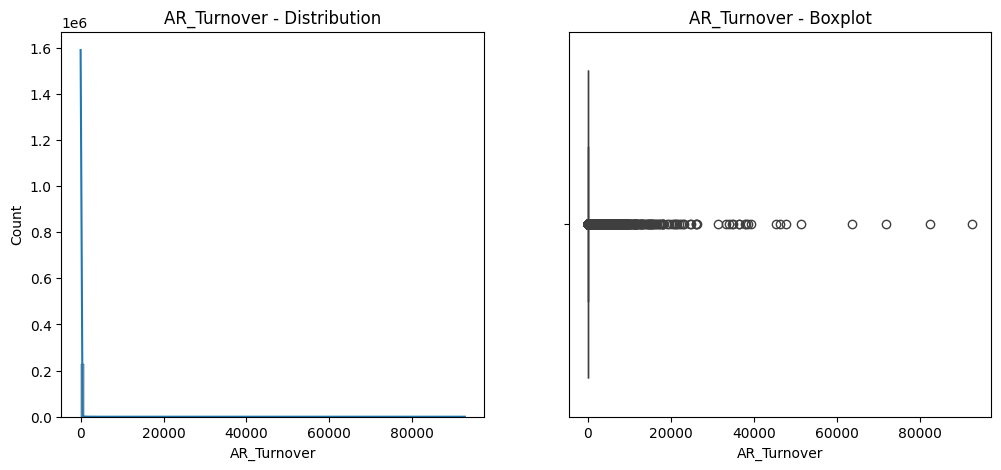

In [6]:
# Descriptive statistics
print(df['AR_Turnover'].describe())

# Checking percentiles
print(df['AR_Turnover'].quantile([0.87, 0.95, 0.99, 0.995]))

# Histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['AR_Turnover'].dropna(), bins=100, kde=True)
plt.title('AR_Turnover - Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AR_Turnover'])
plt.title('AR_Turnover - Boxplot')

plt.show()

## Bad_Receivables_Ratio

count    32219.000000
mean         0.435808
std         20.726785
min         -0.001400
25%          0.003600
50%          0.013700
75%          0.046400
max       3017.985700
Name: Bad_Receivables_Ratio, dtype: float64
0.950    0.283410
0.990    1.129952
0.995    3.218422
Name: Bad_Receivables_Ratio, dtype: float64


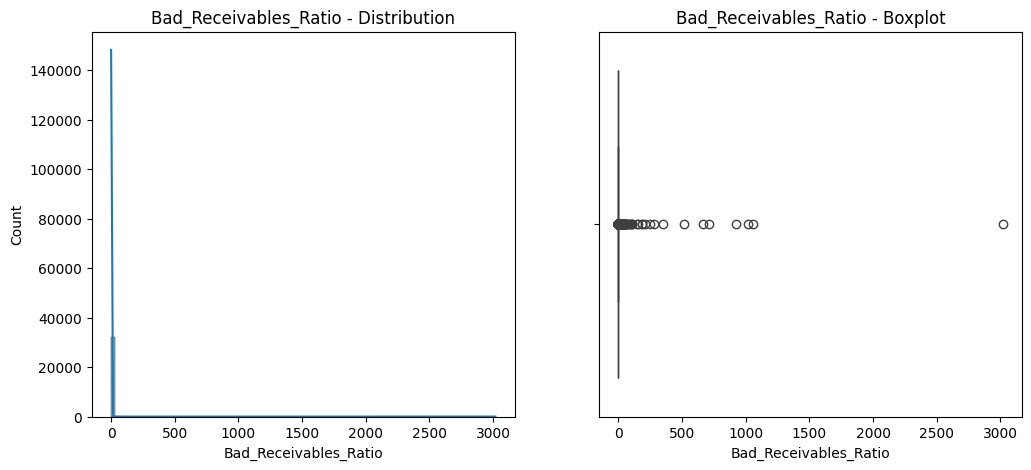

In [7]:
# Descriptive statistics
print(df['Bad_Receivables_Ratio'].describe())

# Checking percentiles
print(df['Bad_Receivables_Ratio'].quantile([0.95, 0.99, 0.995]))

# Histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Bad_Receivables_Ratio'].dropna(), bins=100, kde=True)
plt.title('Bad_Receivables_Ratio - Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Bad_Receivables_Ratio'])
plt.title('Bad_Receivables_Ratio - Boxplot')

plt.show()

## Writeoff_Ratio

count    38462.000000
mean         0.483753
std         19.198869
min         -0.001900
25%          0.002300
50%          0.010300
75%          0.041600
max       3377.976700
Name: Writeoff_Ratio, dtype: float64
0.920    0.198512
0.950    0.364700
0.990    3.197804
0.995    9.022073
Name: Writeoff_Ratio, dtype: float64


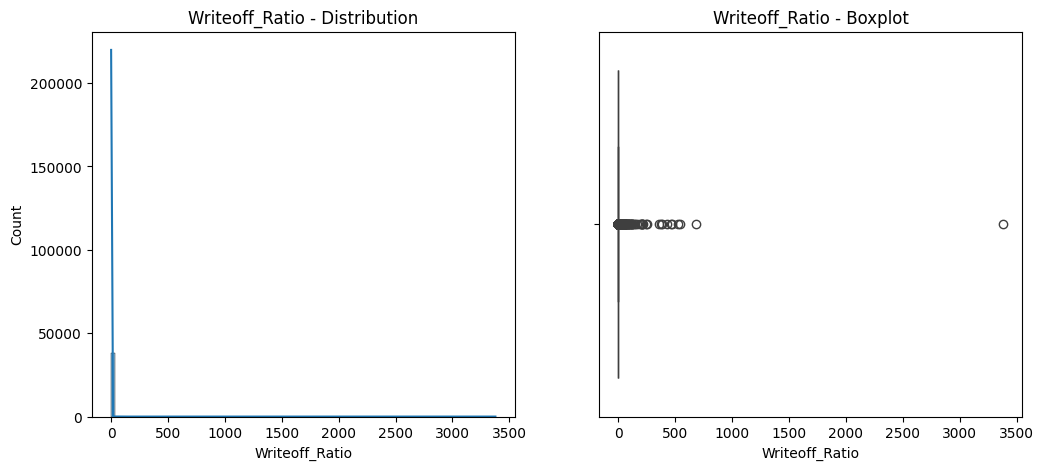

In [8]:
# Descriptive statistics
print(df['Writeoff_Ratio'].describe())

# Check percentiles
print(df['Writeoff_Ratio'].quantile([0.92, 0.95, 0.99, 0.995]))

# Histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Writeoff_Ratio'].dropna(), bins=100, kde=True)
plt.title('Writeoff_Ratio - Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Writeoff_Ratio'])
plt.title('Writeoff_Ratio - Boxplot')

plt.show()



## Revenues

count    227768.000000
mean         85.524147
std         909.175626
min           0.001300
25%           1.449300
50%           8.271500
75%          34.679025
max       97142.148000
Name: Revenues, dtype: float64
0.01       0.006000
0.05       0.061800
0.07       0.111900
0.90     113.256320
0.95     238.890715
0.99    1175.866009
Name: Revenues, dtype: float64


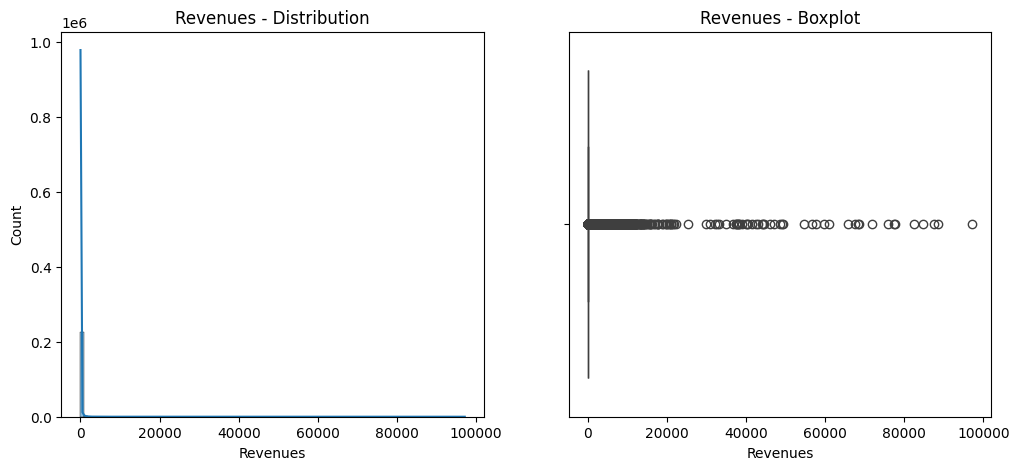

In [9]:
# Descriptive statistics
print(df['Revenues'].describe())

# Checking percentiles
print(df['Revenues'].quantile([0.01, 0.05, 0.07, 0.90, 0.95,0.99]))

# Histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Revenues'].dropna(), bins=100, kde=True)
plt.title('Revenues - Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Revenues'])
plt.title('Revenues - Boxplot')

plt.show()



## Accounts_Receivables

count    227768.000000
mean         14.582339
std         150.485514
min           0.001300
25%           0.248200
50%           1.383300
75%           5.789225
max       34798.582900
Name: Accounts_Receivables, dtype: float64
0.01      0.002000
0.05      0.013700
0.07      0.023400
0.90     19.606300
0.95     42.789685
0.99    218.811138
Name: Accounts_Receivables, dtype: float64


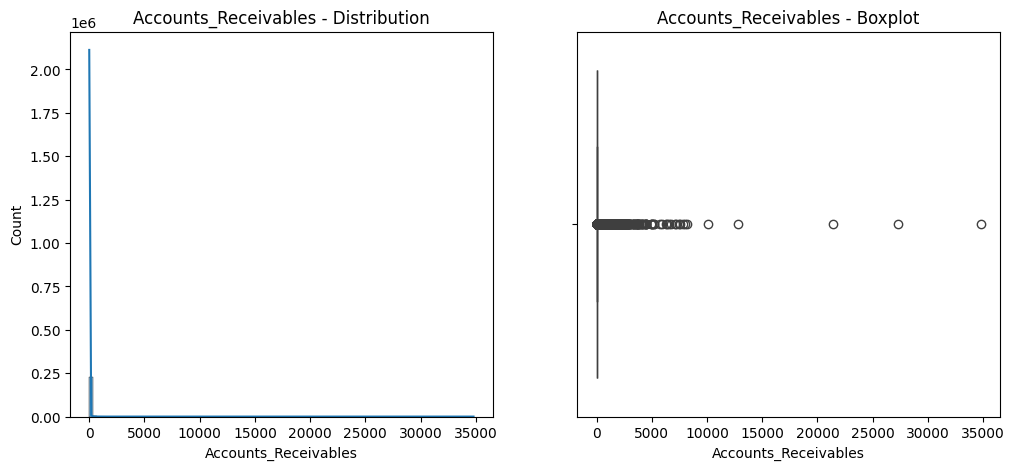

In [10]:
# Descriptive statistics
print(df['Accounts_Receivables'].describe())

# Checking percentiles
print(df['Accounts_Receivables'].quantile([0.01, 0.05, 0.07, 0.90, 0.95,0.99]))

# Histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Accounts_Receivables'].dropna(), bins=100, kde=True)
plt.title('Accounts_Receivables - Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Accounts_Receivables'])
plt.title('Accounts_Receivables - Boxplot')

plt.show()



## Dropping outliers

In [11]:
# Define thresholds
thresholds = {
    'AR_Turnover': 20,
    'Bad_Receivables_Ratio': 3,
    'Writeoff_Ratio': 2,
    'Revenues': 0.1,
    'Revenues1': 300,
    'Accounts_Receivables': 219
}

# Remove rows where any metric exceeds the threshold
df_cleaned = df[
    ((df['AR_Turnover'].isna()) | (df['AR_Turnover'] <= thresholds['AR_Turnover'])) &
    ((df['Bad_Receivables_Ratio'].isna()) | (df['Bad_Receivables_Ratio'] <= thresholds['Bad_Receivables_Ratio'])) &
    ((df['Writeoff_Ratio'].isna()) | (df['Writeoff_Ratio'] <= thresholds['Writeoff_Ratio'])) &
    ((df['Revenues'].isna()) | ((df['Revenues'] >= thresholds['Revenues']) & (df['Revenues'] <= thresholds['Revenues1']))) &
    ((df['Accounts_Receivables'].isna()) | (df['Accounts_Receivables'] <= thresholds['Accounts_Receivables']))
]

print(df_cleaned.shape)

(175246, 35)


## Clustering Industries as there are too many

In [12]:
print(df_cleaned['industry_name'].nunique())

46


In [13]:
industry_cluster_map = {
    # Cluster 1: Primary, Manufacturing & Industrial
    'Agriculture': 'Primary, Manufacturing & Industrial',
    'Mining, quarrying, and extraction': 'Primary, Manufacturing & Industrial',
    'food processing & manufacture': 'Primary, Manufacturing & Industrial',
    'beverages': 'Primary, Manufacturing & Industrial',
    'tobacco': 'Primary, Manufacturing & Industrial',
    'textile manufacturing': 'Primary, Manufacturing & Industrial',
    'apparel industry': 'Primary, Manufacturing & Industrial',
    'leather industry': 'Primary, Manufacturing & Industrial',
    'manufacture of wood and wood products': 'Primary, Manufacturing & Industrial',
    'manufacture of paper and paper products': 'Primary, Manufacturing & Industrial',
    'petroleum refinery': 'Primary, Manufacturing & Industrial',
    'chemicals': 'Primary, Manufacturing & Industrial',
    'pharmaceutical manufacturing': 'Primary, Manufacturing & Industrial',
    'rubber & plastic manufacturing': 'Primary, Manufacturing & Industrial',
    'glass manufacturing': 'Primary, Manufacturing & Industrial',
    'basic metals manufacturing': 'Primary, Manufacturing & Industrial',
    'fabricated metals manufacturing': 'Primary, Manufacturing & Industrial',
    'computer & electronic manufacturing': 'Primary, Manufacturing & Industrial',
    'electrical equipment manufacturing': 'Primary, Manufacturing & Industrial',
    'machinery manufacturing': 'Primary, Manufacturing & Industrial',
    'vehicle manufacturing': 'Primary, Manufacturing & Industrial',
    'other manufacturing': 'Primary, Manufacturing & Industrial',
    'Utility electric power generation': 'Primary, Manufacturing & Industrial',
    'Water & waste management': 'Primary, Manufacturing & Industrial',
    'construction': 'Primary, Manufacturing & Industrial',
    'infra engineering': 'Primary, Manufacturing & Industrial',

    # Cluster 2: Trade, Transport & Real Estate
    'automobile sale & service': 'Trade, Transport & Real Estate',
    'Wholesale trading business': 'Trade, Transport & Real Estate',
    'Retail trading business': 'Trade, Transport & Real Estate',
    'transportation': 'Trade, Transport & Real Estate',
    'Warehousing & storage': 'Trade, Transport & Real Estate',
    'rental and leasing of machines and motor vehicles': 'Trade, Transport & Real Estate',
    'real estate services': 'Trade, Transport & Real Estate',

    # Cluster 3: Technology, Media & Professional Services
    'publishing': 'Technology, Media & Professional Services',
    'video, audio broadcasting': 'Technology, Media & Professional Services',
    'telecom services': 'Technology, Media & Professional Services',
    'software industry': 'Technology, Media & Professional Services',
    'financial services': 'Technology, Media & Professional Services',
    'other professional services': 'Technology, Media & Professional Services',
    'marketing services': 'Technology, Media & Professional Services',
    'business support services': 'Technology, Media & Professional Services',

    # Cluster 4: Social, Public & Consumer Services
    'hotel industry': 'Social, Public & Consumer Services',
    'public administration services': 'Social, Public & Consumer Services',
    'education': 'Social, Public & Consumer Services',
    'healthcare services': 'Social, Public & Consumer Services',
    'other services': 'Social, Public & Consumer Services'
}

# Applying the mapping
df_cleaned['Industry_Cluster'] = df_cleaned['industry_name'].map(industry_cluster_map)

# Quick check
print(df_cleaned.groupby('Industry_Cluster')['industry_name'].nunique())

Industry_Cluster
Primary, Manufacturing & Industrial          26
Social, Public & Consumer Services            5
Technology, Media & Professional Services     8
Trade, Transport & Real Estate                7
Name: industry_name, dtype: int64


/tmp/ipython-input-13-3493225346.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Industry_Cluster'] = df_cleaned['industry_name'].map(industry_cluster_map)


# Descriptive Analysis
## Company & Industry Distribution

/tmp/ipython-input-14-640322072.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


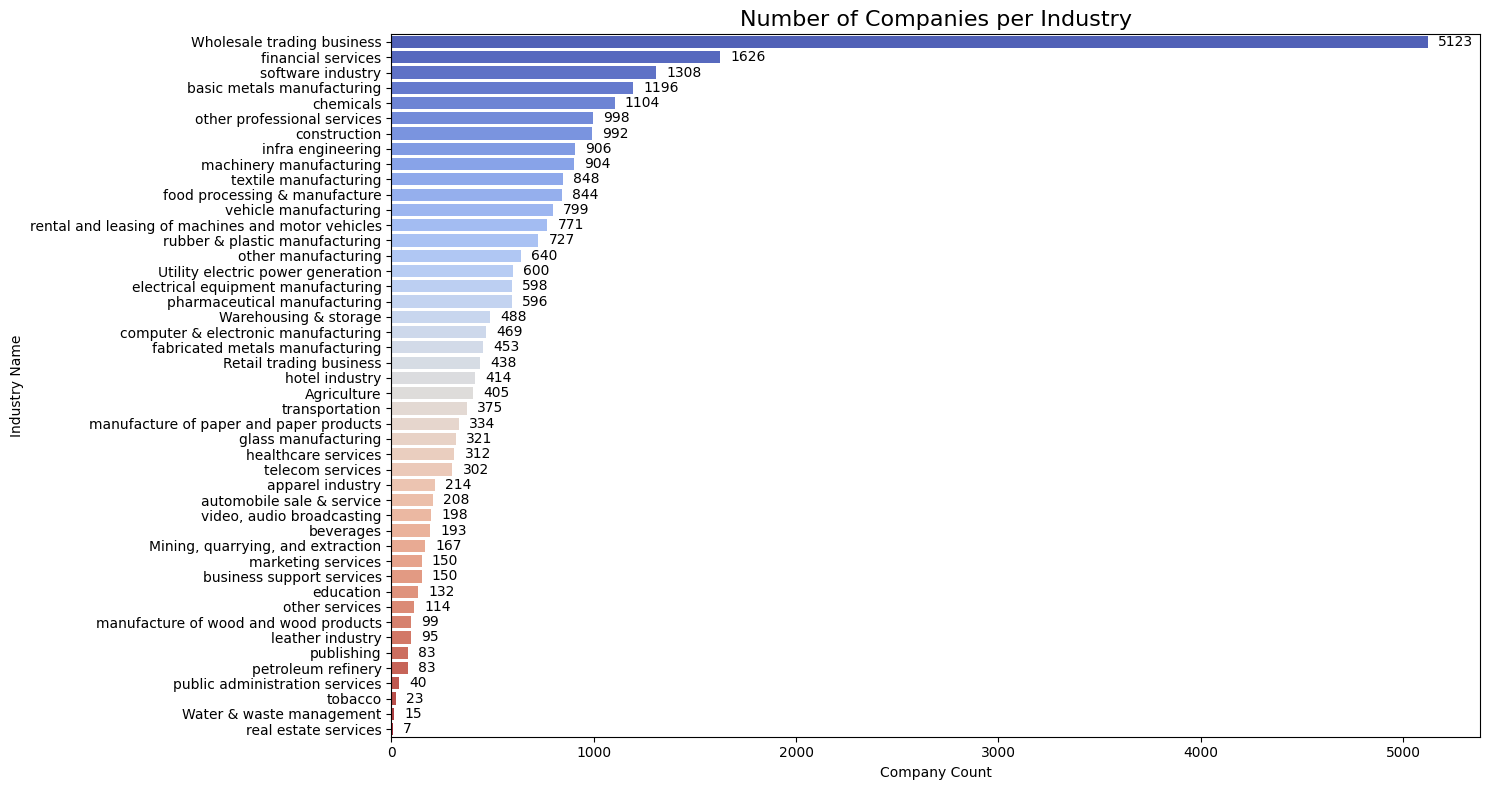

/tmp/ipython-input-14-640322072.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


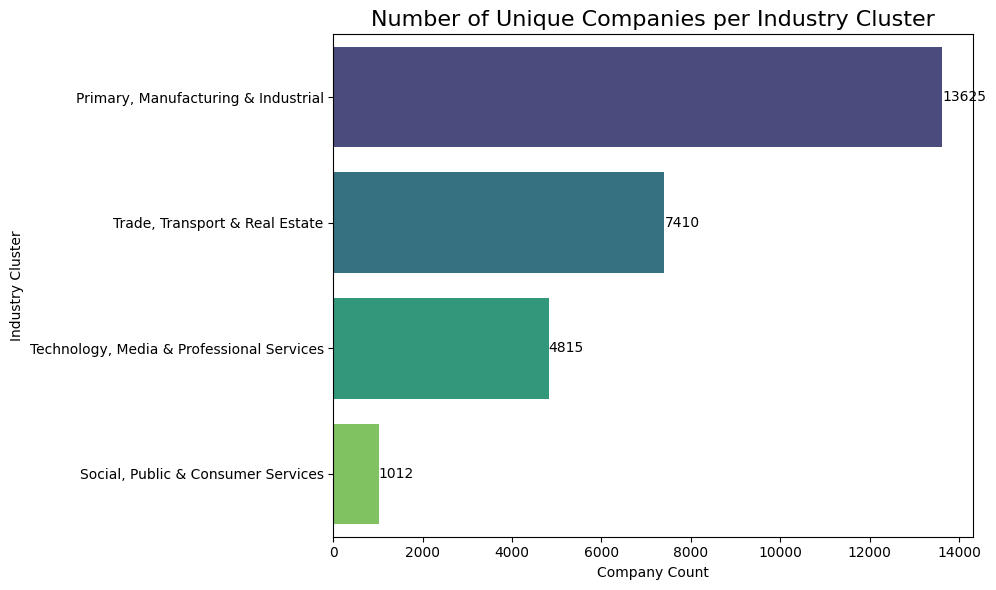

In [14]:
# Unique company counts
industry_counts_df = df_cleaned.groupby('industry_name')['company_code'].nunique().reset_index(name='company_code')
cluster_counts_df = df_cleaned.groupby('Industry_Cluster')['company_code'].nunique().reset_index(name='company_code')

# Sort for plotting
industry_counts_df = industry_counts_df.sort_values(by='company_code', ascending=False)
cluster_counts_df = cluster_counts_df.sort_values(by='company_code', ascending=False)

# Plot: Companies per Industry
plt.figure(figsize=(15, 8))
sns.barplot(
    x='company_code', y='industry_name', data=industry_counts_df,
    palette="coolwarm", legend=False
)
for i, val in enumerate(industry_counts_df['company_code']):
    plt.text(val + 50, i, str(val), va='center')
plt.title("Number of Companies per Industry", fontsize=16)
plt.xlabel("Company Count"); plt.ylabel("Industry Name")
plt.tight_layout(); plt.show()

# Plot: Companies per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x='company_code', y='Industry_Cluster', data=cluster_counts_df,
    palette="viridis", legend=False
)
for i, val in enumerate(cluster_counts_df['company_code']):
    plt.text(val + 5, i, str(val), va='center')
plt.title("Number of Unique Companies per Industry Cluster", fontsize=16)
plt.xlabel("Company Count"); plt.ylabel("Industry Cluster")
plt.tight_layout(); plt.show()


## Cluster-level Metrics Summary


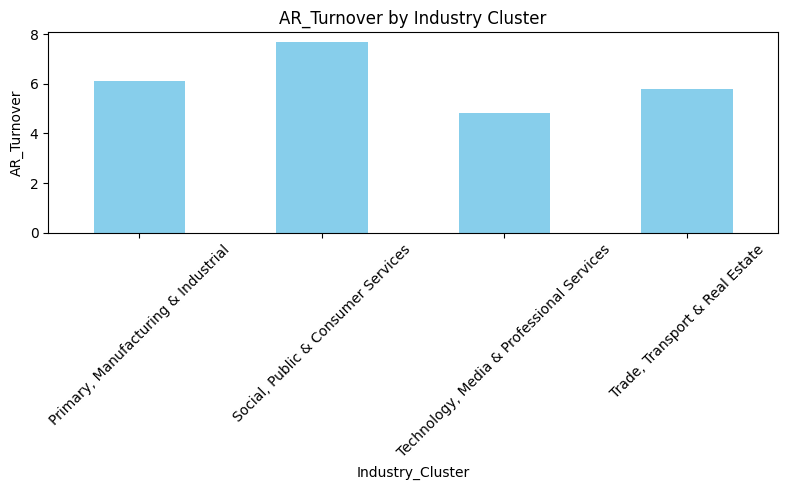

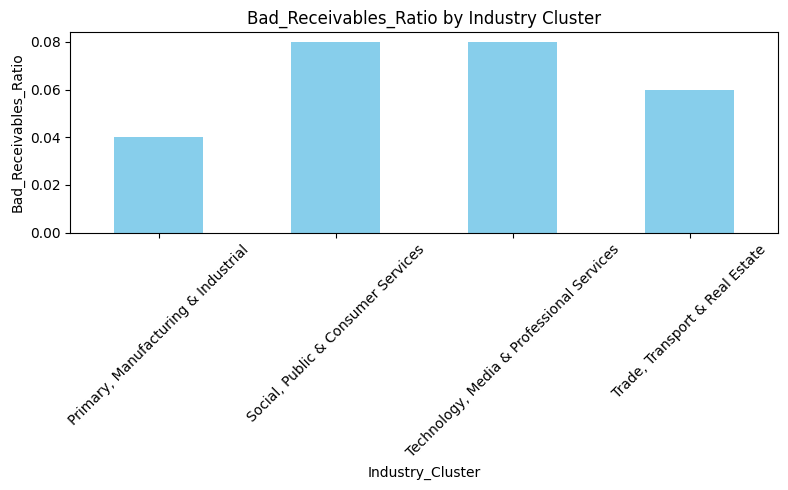

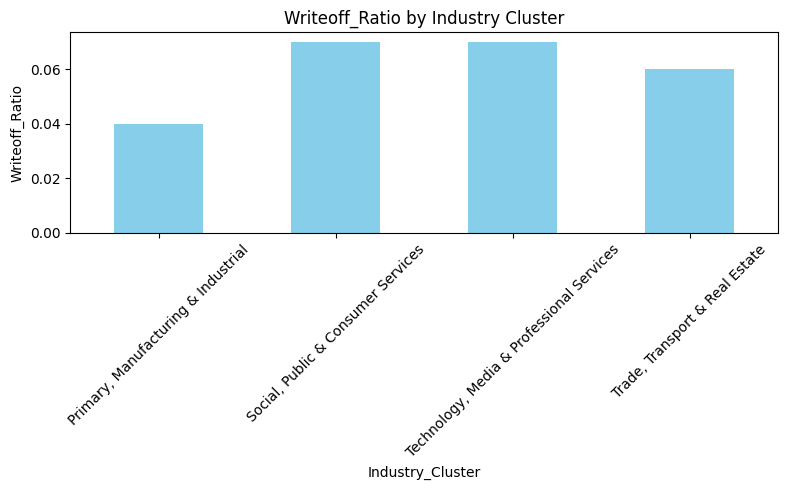

In [15]:
# Calculating mean values for each metric by Industry Cluster
cluster_summary = df_cleaned.groupby('Industry_Cluster').agg({
    'AR_Turnover': 'mean',
    'Bad_Receivables_Ratio': 'mean',
    'Writeoff_Ratio': 'mean'
}).round(2)

# Visualizing each metric
metrics = ['AR_Turnover', 'Bad_Receivables_Ratio', 'Writeoff_Ratio']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    cluster_summary[metric].plot(kind='bar', color='skyblue')
    plt.title(f'{metric} by Industry Cluster')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Trend Over Time (2012–2022)

/tmp/ipython-input-16-1316695062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


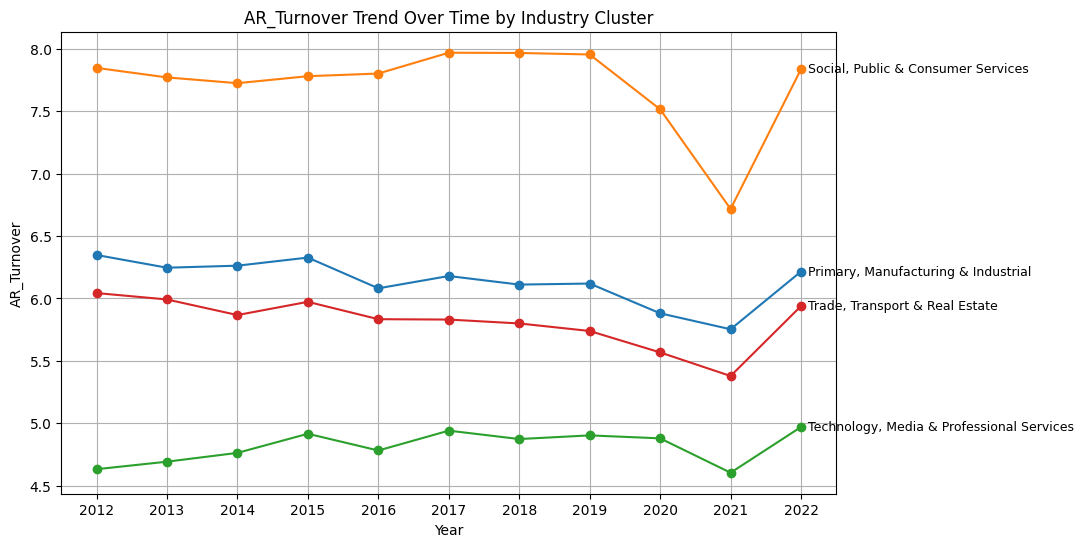

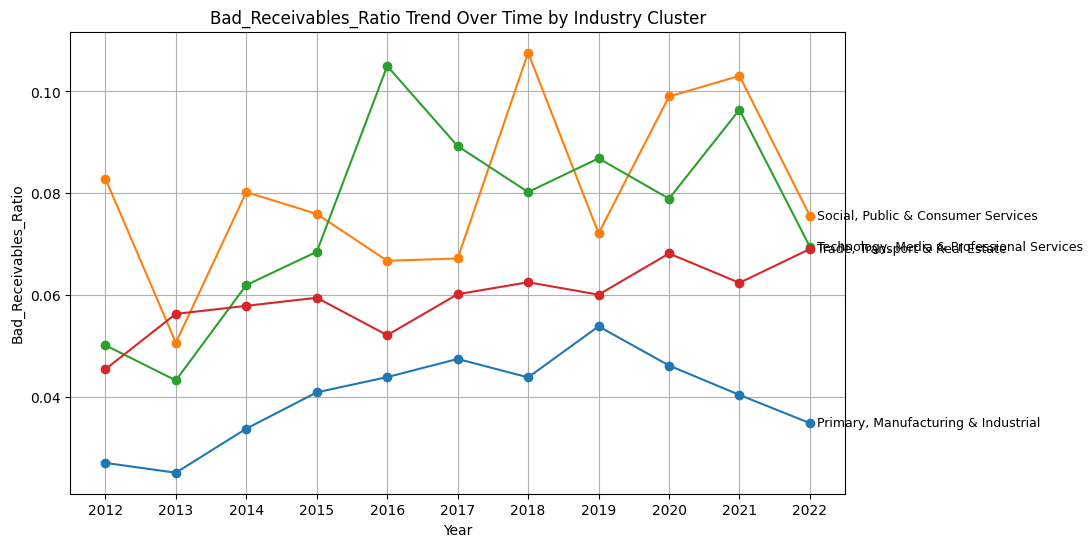

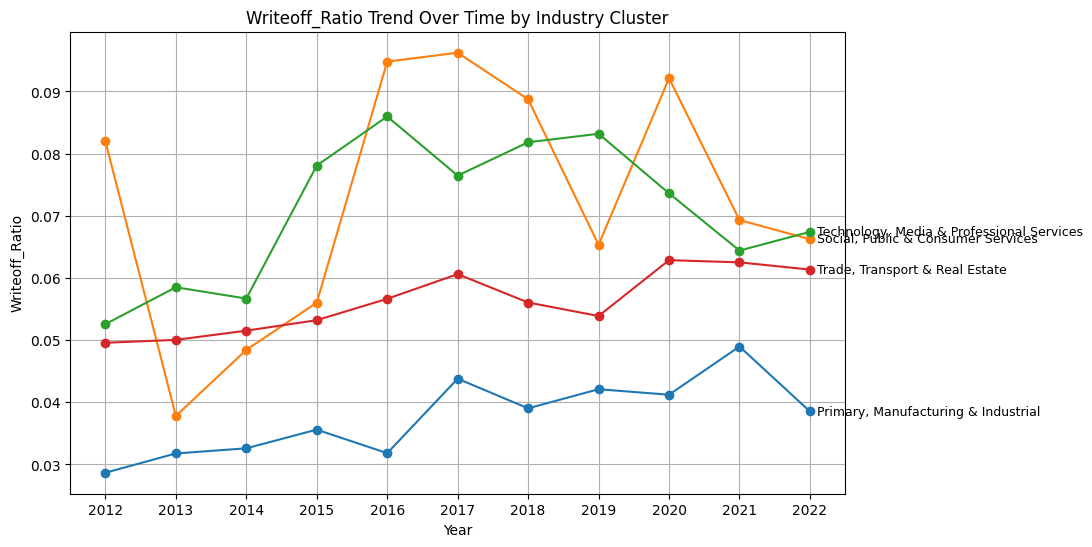

In [16]:
metrics = ['AR_Turnover', 'Bad_Receivables_Ratio', 'Writeoff_Ratio']

df_cleaned['Year'] = df_cleaned['Date'].dt.year

for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Grouping by Year and Industry_Cluster and calculate mean
    trend_data = df_cleaned.groupby(['Year', 'Industry_Cluster'])[metric].mean().reset_index()

    # Plot each Industry_Cluster as a separate line
    for cluster in trend_data['Industry_Cluster'].unique():
        cluster_data = trend_data[trend_data['Industry_Cluster'] == cluster]
        plt.plot(cluster_data['Year'], cluster_data[metric], marker='o', label=cluster)


      # Add label at the last point
        last_year = cluster_data['Year'].max()
        last_value = cluster_data[cluster_data['Year'] == last_year][metric].values[0]
        plt.text(
            x=last_year + 0.1,
            y=last_value,
            s=cluster,
            va='center',
            fontsize=9
        )


    plt.title(f"{metric} Trend Over Time by Industry Cluster")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.xticks(trend_data['Year'].unique())  # ensure all years are shown
    plt.grid(True)
    plt.show()


## Industry-level Insights

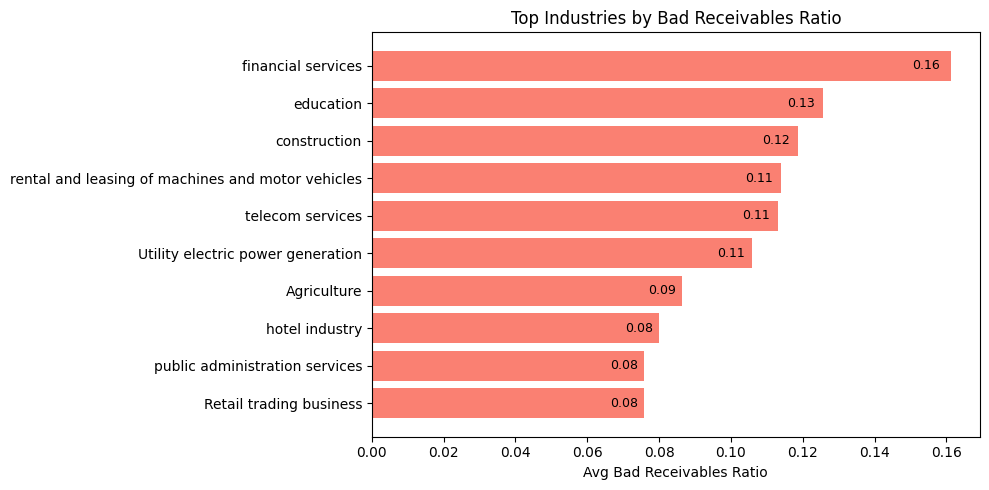

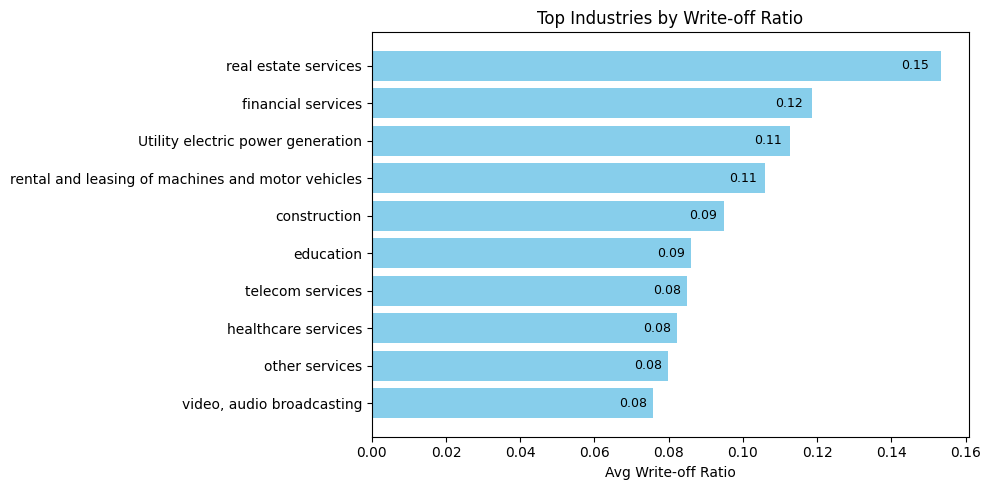

In [17]:
# Group by industry and calculate mean risk metrics
industry_risk_summary = df_cleaned.groupby('industry_name').agg({
    'Bad_Receivables_Ratio': 'mean',
    'Writeoff_Ratio': 'mean'
}).reset_index()

# Sort by Bad_Receivables_Ratio
top_bad_receivables = industry_risk_summary.sort_values(by='Bad_Receivables_Ratio', ascending=False).head(10)
top_writeoffs = industry_risk_summary.sort_values(by='Writeoff_Ratio', ascending=False).head(10)

# Plot: Bad Receivables Ratio
plt.figure(figsize=(10, 5))
bars = plt.barh(top_bad_receivables['industry_name'], top_bad_receivables['Bad_Receivables_Ratio'], color='salmon')
plt.xlabel('Avg Bad Receivables Ratio')
plt.title('Top Industries by Bad Receivables Ratio')
plt.gca().invert_yaxis()

# Add labels inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.02, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", ha='right', va='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()

# Plot: Write-off Ratio
plt.figure(figsize=(10, 5))
bars = plt.barh(top_writeoffs['industry_name'], top_writeoffs['Writeoff_Ratio'], color='skyblue')
plt.xlabel('Avg Write-off Ratio')
plt.title('Top Industries by Write-off Ratio')
plt.gca().invert_yaxis()

# Add labels inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.02, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", ha='right', va='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()


## Diagnostic Analysis



## Do companies with higher sales also have higher AR?

Overall Pearson Correlation between Revenues and Accounts Receivables: 0.68


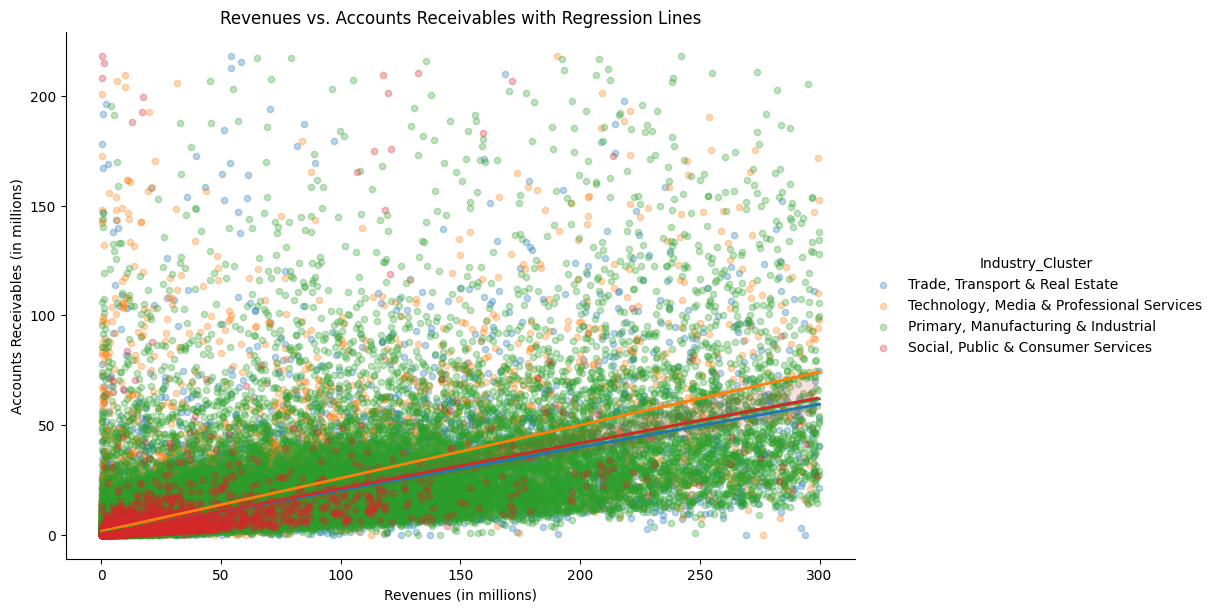

In [18]:
# Calculate overall correlation
correlation = df_cleaned[['Revenues', 'Accounts_Receivables']].corr().iloc[0, 1]
print(f"Overall Pearson Correlation between Revenues and Accounts Receivables: {correlation:.2f}")

# Scatter plot with regression line for each cluster
sns.lmplot(
    data=df_cleaned,
    x='Revenues',
    y='Accounts_Receivables',
    hue='Industry_Cluster',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.3, 's':20}, # lighter scatter dots
    line_kws={'linewidth':2}
)
plt.title('Revenues vs. Accounts Receivables with Regression Lines')
plt.xlabel('Revenues (in millions)')
plt.ylabel('Accounts Receivables (in millions)')
plt.show()


## Does faster AR Turnover reduce Bad Receivables Ratio?

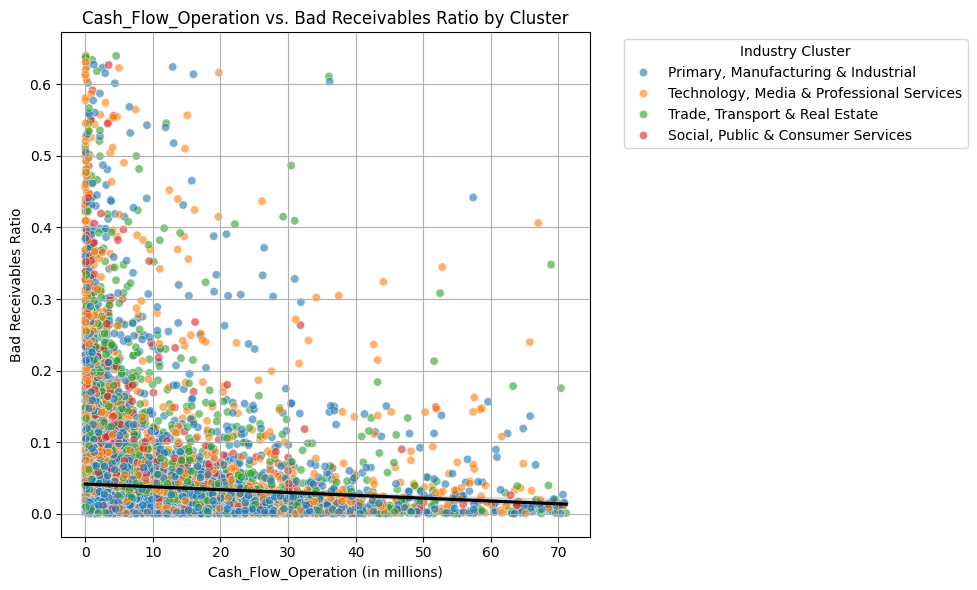


Overall Pearson Correlation: -0.05

Correlation by Industry Cluster:
                            Industry_Cluster  Correlation
0        Primary, Manufacturing & Industrial    -0.035653
1         Social, Public & Consumer Services    -0.147101
2  Technology, Media & Professional Services    -0.077697
3             Trade, Transport & Real Estate    -0.018449


/tmp/ipython-input-19-3425247236.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_corr = df_filtered.groupby('Industry_Cluster').apply(


In [19]:
# Cash_Flow_Operation
# Filtering the data
df_filtered = df_cleaned[
    (df_cleaned['Cash_Flow_Operation'] > 0) &
    (df_cleaned['Bad_Receivables_Ratio'] > 0)
].copy()

# Optional - cap to 99th percentile for better visual clarity
profit_cap = df_filtered['Cash_Flow_Operation'].quantile(0.99)
bad_ratio_cap = df_filtered['Bad_Receivables_Ratio'].quantile(0.99)
df_filtered = df_filtered[
    (df_filtered['Cash_Flow_Operation'] <= profit_cap) &
    (df_filtered['Bad_Receivables_Ratio'] <= bad_ratio_cap)
]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='Cash_Flow_Operation',
    y='Bad_Receivables_Ratio',
    hue='Industry_Cluster',
    alpha=0.6
)

# regression line
sns.regplot(
    data=df_filtered,
    x='Cash_Flow_Operation',
    y='Bad_Receivables_Ratio',
    scatter=False,
    color='black'
)

plt.title('Cash_Flow_Operation vs. Bad Receivables Ratio by Cluster')
plt.xlabel('Cash_Flow_Operation (in millions)')
plt.ylabel('Bad Receivables Ratio')
plt.legend(title='Industry Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Correlation
overall_corr = df_filtered[['Cash_Flow_Operation', 'Bad_Receivables_Ratio']].corr().iloc[0,1]
print(f"\nOverall Pearson Correlation: {round(overall_corr, 2)}\n")

# Cluster-wise correlation
cluster_corr = df_filtered.groupby('Industry_Cluster').apply(
    lambda g: g['Cash_Flow_Operation'].corr(g['Bad_Receivables_Ratio'])
).reset_index(name='Correlation')

print("Correlation by Industry Cluster:")
print(cluster_corr)


### Companies with stronger operating cash flows tend to have slightly lower bad receivables ratios, suggesting that better liquidity may help mitigate receivables risk — though the correlation remains weak across all clusters.



## Which clusters carry the most receivables relative to their sales?

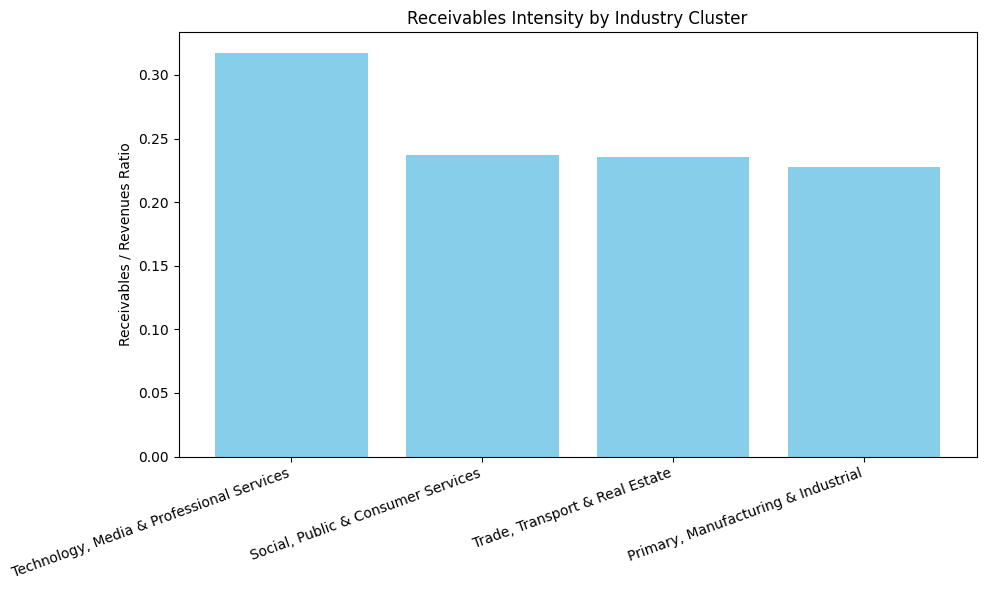

                            Industry_Cluster  Receivables_Intensity
2  Technology, Media & Professional Services               0.317586
1         Social, Public & Consumer Services               0.236999
3             Trade, Transport & Real Estate               0.235189
0        Primary, Manufacturing & Industrial               0.227985


In [20]:
# Group by cluster and compute total AR and Revenue
cluster_grouped = df_cleaned.groupby('Industry_Cluster').agg({
    'Accounts_Receivables': 'sum',
    'Revenues': 'sum'
}).reset_index()

# Calculate Receivables Intensity
cluster_grouped['Receivables_Intensity'] = cluster_grouped['Accounts_Receivables'] / cluster_grouped['Revenues']

# Sort descending
cluster_grouped = cluster_grouped.sort_values(by='Receivables_Intensity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_grouped['Industry_Cluster'], cluster_grouped['Receivables_Intensity'], color='skyblue')
plt.title('Receivables Intensity by Industry Cluster')
plt.ylabel('Receivables / Revenues Ratio')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

# Display table
print(cluster_grouped[['Industry_Cluster', 'Receivables_Intensity']])


### Summary
### Industries like Technology, Media & Professional Services show the highest receivables intensity, which aligns with real-world practices where services are often billed post-delivery and rely more on credit terms.

### In contrast, Primary, Manufacturing & Industrial industries maintain relatively leaner receivables structures, possibly due to stricter payment cycles or different business models.

# Predictive Analysis

In [21]:
# Define selected features and target
features = [
    'Accounts_Receivables',
    'Revenues',
    'Cost_of_Goods_Sold',
    'Profit_After_Tax',
    'EBITDA',
    'Total_Assets',
    'Current_Assets',
    'AR_Turnover',
    'Current_Liabilities',
    'Cash_Balance',
    'Accounts_Payable'
]
target = 'Provision_Bad_Receivables'

# remove missing and non-positive values
df_model = df_cleaned[features + [target]].copy()
df_model = df_model.dropna()
for col in features + [target]:
    df_model = df_model[df_model[col] > 0]

print("Usable rows for modeling:", df_model.shape[0])

Usable rows for modeling: 16029


In [22]:
# Split data
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features for the intercept
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fit the regression model using OLS
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the regression summary
print(results.summary())

# Predict on the test set
y_pred = results.predict(X_test_with_const)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Test Set):", mse)
print("Root Mean Squared Error (Test Set):", rmse)
print("R^2 Score (Test Set):", r2)

                                OLS Regression Results                               
Dep. Variable:     Provision_Bad_Receivables   R-squared:                       0.166
Model:                                   OLS   Adj. R-squared:                  0.165
Method:                        Least Squares   F-statistic:                     232.2
Date:                       Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                               01:47:14   Log-Likelihood:                -13999.
No. Observations:                      12823   AIC:                         2.802e+04
Df Residuals:                          12811   BIC:                         2.811e+04
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------